In [1]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Final dataset 2025.csv to Final dataset 2025.csv


Load dataset

In [3]:
df = pd.read_csv('Final dataset 2025.csv')

In [4]:
df['Crop_Type'].unique()

array(['Barley', 'Soybean', 'Corn', 'Rice'], dtype=object)

In [5]:
df.head(10)

,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality,Acres_seeded
0,Barley,Sandy,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000,43
1,Soybean,Peaty,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667,53
2,Corn,Clay,6.25,15.984306,80.000000,10.655915,72.0,55.0,40.0,51.656273,48.708333,92
3,Corn,Peaty,5.50,13.504963,80.000000,15.382843,66.0,49.5,35.0,22.325127,25.083333,66
4,Barley,Loamy,6.50,18.718556,80.000000,12.114944,70.0,60.0,50.0,81.299066,60.000000,69
5,Soybean,Clay,6.25,17.507242,80.000000,13.474560,54.0,50.0,44.0,54.132866,43.166667,72
6,Corn,Sandy,6.75,22.019794,77.980206,7.461949,60.0,44.0,30.0,46.616260,39.083333,3
7,Corn,Clay,6.25,13.389692,80.000000,12.440552,72.0,55.0,40.0,23.579097,48.708333,74
8,Barley,Loamy,6.50,17.507982,80.000000,8.195808,70.0,60.0,50.0,61.851108,60.000000,22
9,Soybean,Loamy,6.50,17.609708,80.000000,10.890954,63.0,60.0,55.0,69.422898,59.333333,3


In [6]:
df.isnull().sum()

,0
Crop_Type,0
Soil_Type,0
Soil_pH,0
Temperature,0
Humidity,0
Wind_Speed,0
N,0
P,0
K,0
Crop_Yield,0


Check for outliers

In [7]:
import numpy as np
import pandas as pd

# Select numerical columns only
numerical_df = df.select_dtypes(include=['number'])

# Function to detect outliers using IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = (data < lower_bound) | (data > upper_bound)

    return outliers

outlier_summary = numerical_df.apply(detect_outliers_iqr).sum()

print("Number of Outliers per Column:")
print(outlier_summary)


Number of Outliers per Column:
Soil_pH         0
Temperature     0
Humidity        0
Wind_Speed      0
N               0
P               0
K               0
Crop_Yield      0
Soil_Quality    0
Acres_seeded    0
dtype: int64


Hypothetical Situations

In [8]:
import scipy.stats as stats

def categorize_temperature(temp):
    if temp <= 20:
        return 'Low'
    elif 21 <= temp <= 30:
        return 'Medium'
    else:
        return 'High'

df['Temp_Category'] = df['Temperature'].apply(categorize_temperature)

anova_result = stats.f_oneway(
    df[df['Temp_Category'] == 'Low']['Crop_Yield'],
    df[df['Temp_Category'] == 'Medium']['Crop_Yield'],
    df[df['Temp_Category'] == 'High']['Crop_Yield']
)

print(df[df['Temp_Category'] == 'Low']['Crop_Yield'].mean())
print(df[df['Temp_Category'] == 'Low']['Crop_Yield'])

print("ANOVA Test for Crop Yield among Temperature Categories:")
print(f"F-statistic: {anova_result.statistic:.4f}, P-value: {anova_result.pvalue:.2e}")

alpha = 0.05
if anova_result.pvalue < alpha:
    print("Reject the null hypothesis: There is a significant difference in crop yield among temperature categories.")
else:
    print("Fail to reject the null hypothesis: No significant difference in crop yield among temperature categories.")

38.22051482884311
0       58.939796
1       32.970413
2       51.656273
3       22.325127
4       81.299066
          ...    
7057    56.884151
7058    34.842371
7059     5.771988
7060     4.589548
7061    13.069169
Name: Crop_Yield, Length: 3155, dtype: float64
ANOVA Test for Crop Yield among Temperature Categories:
F-statistic: 170.6481, P-value: 4.21e-73
Reject the null hypothesis: There is a significant difference in crop yield among temperature categories.


In [9]:
import scipy.stats as stats

soil_types = df['Soil_Type'].unique()
yield_groups = [df[df['Soil_Type'] == soil]['Crop_Yield'].dropna() for soil in soil_types]

# Ensure no empty groups
yield_groups = [group for group in yield_groups if len(group) > 1]

if len(yield_groups) > 1:
    kruskal_result = stats.kruskal(*yield_groups)
    print(f"Test statistic: {kruskal_result.statistic:.4f}, P-value: {kruskal_result.pvalue:.2e}")

    # Set the significance level (alpha)
    alpha = 0.05

    # Evaluate the p-value
    if kruskal_result.pvalue < alpha:
        print("Reject the null hypothesis: There is a significant difference in average crop yield between soil types.")
    else:
        print("Fail to reject the null hypothesis: No significant difference in average crop yield between soil types.")


Test statistic: 771.4552, P-value: 6.71e-167
Reject the null hypothesis: There is a significant difference in average crop yield between soil types.


In [10]:
# Hypothesis 7: Humidity has a significant impact on Crop Yield (Spearman Correlation)
correlation_humidity = stats.spearmanr(df['Humidity'], df['Crop_Yield'])
print("\nSpearman Correlation Test for Humidity and Crop Yield:")
print(f"Correlation Coefficient: {correlation_humidity.statistic:.5f}, P-value: {correlation_humidity.pvalue:.2e}")
if correlation_humidity.pvalue < 0.05:
    print("Reject the null hypothesis: Humidity has a significant impact on crop yield.")
else:
    print("Fail to reject the null hypothesis: No significant impact of humidity on crop yield.")




Spearman Correlation Test for Humidity and Crop Yield:
Correlation Coefficient: 0.18502, P-value: 2.03e-55
Reject the null hypothesis: Humidity has a significant impact on crop yield.


In [11]:
# Hypothesis 8: Soil Quality has a significant impact on Crop Yield (ANOVA Test)
anova_soil = stats.f_oneway(df['Soil_Quality'], df['Crop_Yield'])
print("\nANOVA Test for Soil Quality and Crop Yield:")
print(f"F-statistic: {anova_soil.statistic:.4f}, P-value: {anova_soil.pvalue:.2e}")
if anova_soil.pvalue < 0.05:
    print("Reject the null hypothesis: Soil Quality has a significant impact on crop yield.")
else:
    print("Fail to reject the null hypothesis: No significant impact of soil quality on crop yield.")




ANOVA Test for Soil Quality and Crop Yield:
F-statistic: 77.9221, P-value: 1.20e-18
Reject the null hypothesis: Soil Quality has a significant impact on crop yield.


Load dataset

In [12]:
df = pd.read_csv('Final dataset 2025.csv')

In [13]:
# Crop price data
crop_prices = pd.DataFrame({
    'Crop_Type': ['Corn', 'Barley', 'Soybean', 'Rice'],
    'Price': [7.26, 5.30, 5.99, 8.38]
}).set_index('Crop_Type')

df['Price_per_unit'] = df['Crop_Type'].map(crop_prices['Price'])

print(df.iloc[:].head())


  Crop_Type Soil_Type  Soil_pH  Temperature  Humidity  Wind_Speed     N     P  \
0    Barley     Sandy     6.75    19.751848      80.0    2.682683  50.0  40.0   
1   Soybean     Peaty     5.50    16.110395      80.0    7.696070  49.5  45.0   
2      Corn      Clay     6.25    15.984306      80.0   10.655915  72.0  55.0   
3      Corn     Peaty     5.50    13.504963      80.0   15.382843  66.0  49.5   
4    Barley     Loamy     6.50    18.718556      80.0   12.114944  70.0  60.0   

      K  Crop_Yield  Soil_Quality  Acres_seeded  Price_per_unit  
0  30.0   58.939796     35.000000            43            5.30  
1  38.5   32.970413     22.166667            53            5.99  
2  40.0   51.656273     48.708333            92            7.26  
3  35.0   22.325127     25.083333            66            7.26  
4  50.0   81.299066     60.000000            69            5.30  


Feature Engineering

In [14]:
# Define a function to calculate seeds per acre
def calculate_seeds_per_acre(Crop_Type):
    if Crop_Type == 'Corn':
        return 27.5  # kg per acre
    elif Crop_Type == 'Barley':
        return 55.0  # kg per acre
    elif Crop_Type == 'Soybean':
        return 55.0  # kg per acre
    elif Crop_Type == 'Rice':
        return 90.0  # kg per acre
    else:
        return 0  # Unknown crop type

# Apply the function to create a new column
df['Seeds_per_acre_kg'] = df['Crop_Type'].apply(calculate_seeds_per_acre)

print(df[['Crop_Type', 'Seeds_per_acre_kg']])

     Crop_Type  Seeds_per_acre_kg
0       Barley               55.0
1      Soybean               55.0
2         Corn               27.5
3         Corn               27.5
4       Barley               55.0
...        ...                ...
7057   Soybean               55.0
7058      Corn               27.5
7059    Barley               55.0
7060   Soybean               55.0
7061    Barley               55.0

[7062 rows x 2 columns]


In [15]:
df.head(10)

,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality,Acres_seeded,Price_per_unit,Seeds_per_acre_kg
0,Barley,Sandy,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000,43,5.30,55.0
1,Soybean,Peaty,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667,53,5.99,55.0
2,Corn,Clay,6.25,15.984306,80.000000,10.655915,72.0,55.0,40.0,51.656273,48.708333,92,7.26,27.5
3,Corn,Peaty,5.50,13.504963,80.000000,15.382843,66.0,49.5,35.0,22.325127,25.083333,66,7.26,27.5
4,Barley,Loamy,6.50,18.718556,80.000000,12.114944,70.0,60.0,50.0,81.299066,60.000000,69,5.30,55.0
5,Soybean,Clay,6.25,17.507242,80.000000,13.474560,54.0,50.0,44.0,54.132866,43.166667,72,5.99,55.0
6,Corn,Sandy,6.75,22.019794,77.980206,7.461949,60.0,44.0,30.0,46.616260,39.083333,3,7.26,27.5
7,Corn,Clay,6.25,13.389692,80.000000,12.440552,72.0,55.0,40.0,23.579097,48.708333,74,7.26,27.5
8,Barley,Loamy,6.50,17.507982,80.000000,8.195808,70.0,60.0,50.0,61.851108,60.000000,22,5.30,55.0
9,Soybean,Loamy,6.50,17.609708,80.000000,10.890954,63.0,60.0,55.0,69.422898,59.333333,3,5.99,55.0


In [16]:
# Calculate total cost by acre using acres seeded
df['Total_Cost'] = (df['Seeds_per_acre_kg'] * df['Price_per_unit']) * df['Acres_seeded']

In [17]:
df.head(10)

,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality,Acres_seeded,Price_per_unit,Seeds_per_acre_kg,Total_Cost
0,Barley,Sandy,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000,43,5.30,55.0,12534.50
1,Soybean,Peaty,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667,53,5.99,55.0,17460.85
2,Corn,Clay,6.25,15.984306,80.000000,10.655915,72.0,55.0,40.0,51.656273,48.708333,92,7.26,27.5,18367.80
3,Corn,Peaty,5.50,13.504963,80.000000,15.382843,66.0,49.5,35.0,22.325127,25.083333,66,7.26,27.5,13176.90
4,Barley,Loamy,6.50,18.718556,80.000000,12.114944,70.0,60.0,50.0,81.299066,60.000000,69,5.30,55.0,20113.50
5,Soybean,Clay,6.25,17.507242,80.000000,13.474560,54.0,50.0,44.0,54.132866,43.166667,72,5.99,55.0,23720.40
6,Corn,Sandy,6.75,22.019794,77.980206,7.461949,60.0,44.0,30.0,46.616260,39.083333,3,7.26,27.5,598.95
7,Corn,Clay,6.25,13.389692,80.000000,12.440552,72.0,55.0,40.0,23.579097,48.708333,74,7.26,27.5,14774.10
8,Barley,Loamy,6.50,17.507982,80.000000,8.195808,70.0,60.0,50.0,61.851108,60.000000,22,5.30,55.0,6413.00
9,Soybean,Loamy,6.50,17.609708,80.000000,10.890954,63.0,60.0,55.0,69.422898,59.333333,3,5.99,55.0,988.35


Encoding categorical variables for creating corelation matrix

In [18]:
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
df_encoded = df.copy()
label_encoders = {}
for col in ["Crop_Type", "Soil_Type"]:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    label_encoders[col] = le


Excluding unnecessary columns for yield prediction

In [19]:
# Define columns to exclude from correlation analysis
exclude_columns = ['Price_per_unit','Acres_seeded',	'Seeds_per_acre_kg', 'Total_Cost']

# Filter out excluded columns for overall correlation
columns_to_use = [col for col in df_encoded.columns if col not in exclude_columns]
df_encoded_filtered = df_encoded[columns_to_use]

# Compute correlation matrix for numerical features (excluding specified columns)
corr_matrix = df_encoded_filtered.corr()

Plotting correlation matrix

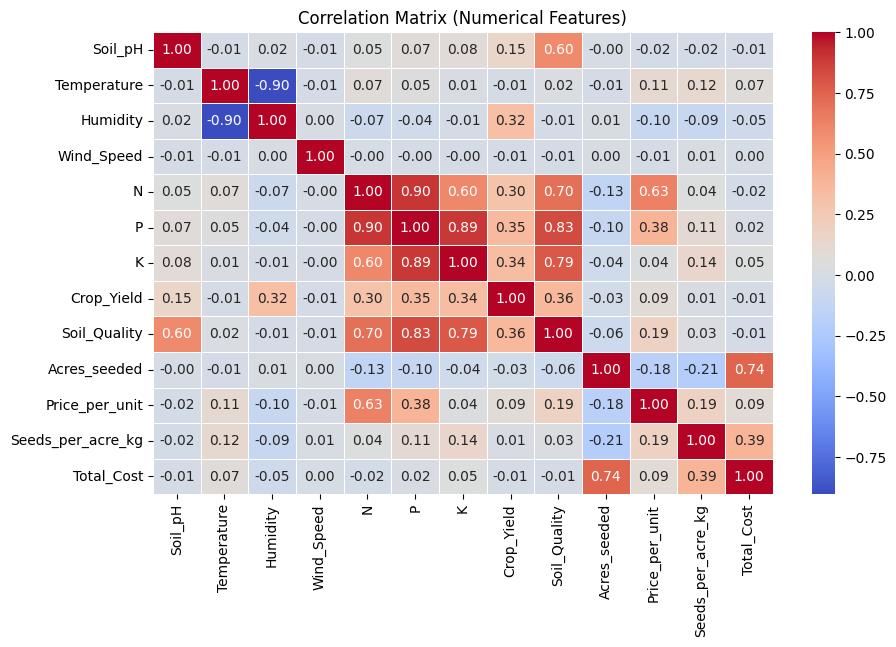

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Numerical Features)")
plt.show()


Encoding and splitting test / train data

In [21]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Make a copy of the original data
df_encoded = df.copy()

# Label encode categorical columns
label_encoder = LabelEncoder()
df_encoded['Crop_Type'] = label_encoder.fit_transform(df_encoded['Crop_Type'])
df_encoded['Soil_Type'] = label_encoder.fit_transform(df_encoded['Soil_Type'])

# Define the numerical columns to scale
numerical_columns_to_scale = ['Soil_pH', 'Temperature', 'Humidity', 'Wind_Speed',
                              'N', 'P', 'K', 'Soil_Quality']

# Scale the numerical columns
scaler = StandardScaler()
df_encoded[numerical_columns_to_scale] = scaler.fit_transform(df_encoded[numerical_columns_to_scale])

# Define X and y
X = df_encoded.drop(columns=["Crop_Yield","Acres_seeded", "Price_per_unit", "Seeds_per_acre_kg", "Total_Cost"])
y = df_encoded["Crop_Yield"]

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(df_encoded)


      Crop_Type  Soil_Type   Soil_pH  Temperature  Humidity  Wind_Speed  \
0             0          3  1.067137    -0.208687  0.813866   -2.560016   
1             3          2 -1.592608    -0.912156  0.813866   -0.815933   
2             1          0  0.003239    -0.936514  0.813866    0.213752   
3             1          2 -1.592608    -1.415481  0.813866    1.858180   
4             0          1  0.535188    -0.408302  0.813866    0.721327   
...         ...        ...       ...          ...       ...         ...   
7057          3          0  0.003239    -0.545526  0.813866    0.744632   
7058          1          1  0.535188    -1.416295  0.813866    0.225114   
7059          0          3  1.067137    -1.892798  0.813866   -1.907478   
7060          3          2 -1.592608    -1.927673  0.813866   -1.890719   
7061          0          0  0.003239    -1.780055  0.813866    1.620798   

             N         P         K  Crop_Yield  Soil_Quality  Acres_seeded  \
0    -1.095050 -1.344

Using RFE method for feature selection

In [22]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

rfe_model = RandomForestRegressor(random_state=42)
rfe = RFE(rfe_model, n_features_to_select=7)
rfe.fit(X_train, y_train)

selected_rfe = X.columns[rfe.support_].tolist()
print("RFE Selected Features for Crop Yield:", selected_rfe)

# Feature importance
rfe_model.fit(X_train, y_train)
importances = rfe_model.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")


RFE Selected Features for Crop Yield: ['Crop_Type', 'Temperature', 'Humidity', 'N', 'P', 'K', 'Soil_Quality']
Crop_Type: 0.0389
Soil_Type: 0.0216
Soil_pH: 0.0055
Temperature: 0.4668
Humidity: 0.1663
Wind_Speed: 0.0164
N: 0.0737
P: 0.0450
K: 0.0337
Soil_Quality: 0.1319


Train model using selected features

In [28]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.7/169.7 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 114.4 MB/s eta 0:00:00
   ━━

In [23]:
# Import PyCaret's regression module
from pycaret.regression import *

# Select only the top RFE features and add the target column
selected_features = selected_rfe + ['Crop_Yield']
df_selected = df[selected_features]

# Setup PyCaret with selected features
regression_setup = setup(
    data=df_selected,
    target='Crop_Yield',
    session_id=123,
    normalize=False,
    verbose=False
)
# Compare models
best_model = compare_models()

# Save the best model for later use
save_model(best_model, 'yield_prediction_models')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,3.2862,21.1285,4.5944,0.9561,0.1235,0.2110,0.1930
knn,K Neighbors Regressor,3.4400,22.9588,4.7895,0.9523,0.1357,0.2908,0.0610
xgboost,Extreme Gradient Boosting,3.4700,23.8538,4.8821,0.9504,0.1137,0.1500,0.2400
rf,Random Forest Regressor,3.6231,25.9500,5.0926,0.9461,0.1129,0.1030,1.4780
gbr,Gradient Boosting Regressor,3.6838,26.1856,5.1152,0.9456,0.1462,0.2701,0.4520
et,Extra Trees Regressor,3.9095,30.2176,5.4949,0.9371,0.1214,0.1099,1.0540
dt,Decision Tree Regressor,4.4259,38.1052,6.1719,0.9207,0.1397,0.1221,0.0650
ada,AdaBoost Regressor,9.6272,136.6634,11.6837,0.7167,0.5034,1.9131,0.2320
br,Bayesian Ridge,8.7341,160.3525,12.6509,0.6674,0.5255,1.2528,0.0830
ridge,Ridge Regression,8.7337,160.3627,12.6513,0.6674,0.5255,1.2525,0.0490


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Temperature', 'Humidity', 'N',
                                              'P', 'K', 'Soil_Quality'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Crop_Type'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['Crop_Type'],
                                     transformer=OneHotEncoder(cols=['Crop_Type'],
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),
                 ('trained_model', LGBMRegressor(n_jobs=-1, random_state=123))]),
 'yield_prediction_models.pkl')

In [25]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score

# Filter X_train and X_test using the selected RFE features
X_train_selected = X_train[selected_rfe]
X_test_selected = X_test[selected_rfe]

# Initialize the LightGBM model
lgb_model = lgb.LGBMRegressor(
    objective='regression',
    boosting_type='gbdt',
    n_estimators=100,
    learning_rate=0.1,
    num_leaves=31,
    random_state=42
)

# Train the model
lgb_model.fit(X_train_selected, y_train)

# Predict on the test set
y_pred = lgb_model.predict(X_test_selected)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ LightGBM Yield Prediction:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000511 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 568
[LightGBM] [Info] Number of data points in the train set: 5649, number of used features: 7
[LightGBM] [Info] Start training from score 39.742540
✅ LightGBM Yield Prediction:
Mean Squared Error: 21.4551
R² Score: 0.9532


In [26]:
import joblib

# Save the trained LightGBM model
joblib.dump(lgb_model, 'lightgbm_model.pkl')


['lightgbm_model.pkl']

In [27]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.6/322.6 kB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 105.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.1 MB/s eta 0:00:00


In [28]:
import gradio as gr
import pandas as pd
import logging
import lightgbm as lgb
from joblib import load  # For loading the model
from sklearn.preprocessing import LabelEncoder

# Setup logging to capture errors
logging.basicConfig(level=logging.DEBUG)

# Load the yield prediction model
yield_model = load("lightgbm_model.pkl")

# Initialize LabelEncoder for crop type
crop_encoder = LabelEncoder()

# Load the DataFrame to fit the encoder
crop_types = ['Rice', 'Barley', 'Corn', 'Soybean']
crop_encoder.fit(crop_types)

# Prediction function for yield (remains the same)
def predict_yield(crop_type, temperature, humidity, n, p, k, soil_quality):
    try:
        # Encode crop type
        crop_type_encoded = crop_encoder.transform([crop_type])[0]
        print(f"Encoded Crop Type (Yield): {crop_type_encoded}")

        # Prepare the input data as a DataFrame
        input_df_yield = pd.DataFrame([{
            'Crop_Type': crop_type_encoded,
            'Temperature': temperature,
            'Humidity': humidity,
            'N': n,
            'P': p,
            'K': k,
            'Soil_Quality': soil_quality
        }])

        # Get the expected features from the yield model
        expected_features_yield = yield_model.booster_.feature_name()
        input_df_yield = input_df_yield[expected_features_yield]

        print("Input DataFrame for Yield Prediction:")
        print(input_df_yield.to_markdown(index=False))

        # Make prediction using the saved yield model
        prediction = yield_model.predict(input_df_yield)
        print(f"Raw yield prediction from Gradio: {prediction}")

        # Return the predicted yield
        return round(prediction[0], 2)

    except Exception as e:
        print(f"Error during yield prediction: {str(e)}")
        return f"Error: {str(e)}"

# Gradio Blocks for the UI (only the desired input fields)
with gr.Blocks(theme=gr.themes.Default()) as demo:
    gr.Markdown("""
    <h2 style="text-align:center; color:#4caf50; font-size:32px; font-family: 'Arial', sans-serif;">Crop Yield Prediction Engine</h2>
    <p style="text-align:center; font-size:16px; color:#bbb;">
        Input the crop and environmental factors below to predict the crop yield (tons per acre) and total cost.
    </p>
    """)
    with gr.Row():
        with gr.Column():
            crop = gr.Dropdown(crop_types, label="Crop Type")
            temp = gr.Number(label="Temperature (°C)")
            hum = gr.Number(label="Humidity (%)")
            n = gr.Number(label="Nitrogen (N)")
        with gr.Column():
            p = gr.Number(label="Phosphorus (P)")
            k = gr.Number(label="Potassium (K)")
            sq = gr.Number(label="Soil Quality")

    predict_yield_btn = gr.Button("Predict Yield")

    with gr.Row():
        yield_output = gr.Number(label="Predicted Yield (tons/acre)")

    predict_yield_btn.click(
        fn=predict_yield,
        inputs=[crop, temp, hum, n, p, k, sq],
        outputs=yield_output
    )

demo.launch(debug=True)

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://0a369f9a306d50e0bc.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Encoded Crop Type (Yield): 2
Input DataFrame for Yield Prediction:
|   Crop_Type |   Temperature |   Humidity |   N |   P |   K |   Soil_Quality |
|------------:|--------------:|-----------:|----:|----:|----:|---------------:|
|           2 |             0 |          0 |   0 |   0 |   0 |              0 |
Raw yield prediction from Gradio: [51.65477999]
Encoded Crop Type (Yield): 2
Input DataFrame for Yield Prediction:
|   Crop_Type |   Temperature |   Humidity |   N |   P |   K |   Soil_Quality |
|------------:|--------------:|-----------:|----:|----:|----:|---------------:|
|           2 |             0 |          0 |   0 |   0 |   0 |             12 |
Raw yield prediction from Gradio: [55.27533253]
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://0a369f9a306d50e0bc.gradio.live
